# Lab 2:  Electric Field Mapping

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here and it should work fine.

dark_mode = False
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

# Parallel Plates - Small Distance

In [14]:
# Create a Pandas DataFrame with data for part 1

# The data elements are [V, dV, x_cm, dx_cm]

data = [[2.00,0.05,1.1,0.1], [4.00,0.05,2.2,0.1], [6.00,0.05,3.4,0.1], [8.00,0.05,4.6,0.1], 
        [10.00,0.05,5.7,0.1]]
# create dataframe
df = pd.DataFrame(data, columns = ['V', 'dV','x_cm','dx_cm'])

print(df.to_string(index=False))

   V   dV  x_cm  dx_cm
 2.0 0.05   1.1    0.1
 4.0 0.05   2.2    0.1
 6.0 0.05   3.4    0.1
 8.0 0.05   4.6    0.1
10.0 0.05   5.7    0.1


In [15]:
df['x'] = 0.01*df['x_cm']
df['dx'] = 0.01*df['dx_cm']

print(df.to_string(index=False))

   V   dV  x_cm  dx_cm     x    dx
 2.0 0.05   1.1    0.1 0.011 0.001
 4.0 0.05   2.2    0.1 0.022 0.001
 6.0 0.05   3.4    0.1 0.034 0.001
 8.0 0.05   4.6    0.1 0.046 0.001
10.0 0.05   5.7    0.1 0.057 0.001


Beta: [1.72409797e+02 1.38067072e-01]
Beta Std Error: [1.71618487 0.06478752]
Beta Covariance: [[23.94746352 -0.81421334]
 [-0.81421334  0.03412826]]
Residual Variance: 0.12298966406258514
Inverse Condition #: 0.016113464683005976
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (172.409796581 +/- 1.716184866) X + (0.138067072 +/- 0.064787525)


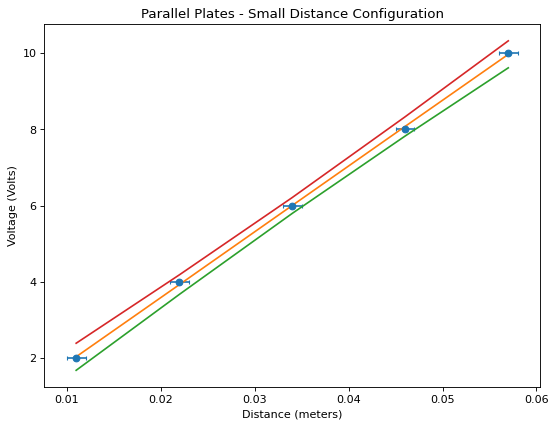

In [16]:
xi = df['x']
yi = df['V']
sigmaxi = df['dx']
sigmayi = df['dV']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,0.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Distance (meters)')
plt.ylabel('Voltage (Volts)')
plt.title('Parallel Plates - Small Distance Configuration')
plt.show()

In [17]:
# Expected Electric Field calculation

d_plates = 6.9*0.01
dd_plates = 0.1*0.01

V_plates = 12.0
dV_plates = 0.05

E_expected = V_plates/d_plates
dE_expected = E_expected*(dV_plates/V_plates+dd_plates/d_plates)

print("Expected Electric Field = %0.1f +/- %0.1f" % (E_expected,dE_expected))

Expected Electric Field = 173.9 +/- 3.2


## Analysis of Voltage vs. Position Result

First of all, we see that this is a pretty good linear fit!

Second, we see that the result for the y-intercept (b) is $(0.494 \pm 0.082)$ Volts.  This is close to zero, but still inconsistent with our expectations.

Third, we see that the average electric field (the slope) that we were trying to determine is
$(169.9 \pm 2.3)$ Volts per meter.  Based on the calculation of the expected value (in the next cell), we are not in agreement with that result.  Why?

# Parallel Plates - Large Distance

Complete the analysis for the large distance configuration, based on the analysis above.